# **윤슬의 잔물결✨**



[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 1: 데이터 불러오기](https://dacon.io/competitions/official/236047/codeshare/7455?page=1&dtype=random)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 2: 데이터 전처리 및 모델링](https://dacon.io/codeshare/7655)
</br>[[윤슬🌊] 퇴근시간 버스승차인원 예측 경진대회 Stage 3: 고급 시각화 및 모델링](https://dacon.io/competitions/official/236047/codeshare/7656)

<br/>
<div style="text-align: right"> 23-02-01 | ver.004 </div>

---



분석을 시작하기에 앞서 사용했던 라이브러리와 데이터를 불러오겠습니다😊

> 라이브러리 호출

In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split

> 데이터 불러오기

In [41]:
train = pd.read_csv('train.csv' ,index_col=0)
test = pd.read_csv('test.csv', index_col=0)
bus = pd.read_csv('bus_bts.csv' ,index_col=0)
submission = pd.read_csv('submission_sample.csv', index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> 전처리

In [42]:
# train 데이터셋 전처리
train = train.replace('시내', 0)
train = train.replace('시외', 1)

train = train.drop(['station_name'], axis = 1)

train['date'] = pd.to_datetime(train['date'])
train['date'] = train['date'].dt.weekday

In [43]:
# test 데이터셋 전처리
test = test.replace('시외', 1)
test = test.replace('시내', 0)

test = test.drop(['station_name'], axis = 1)

test['date'] = pd.to_datetime(test['date'])
test['date'] = test['date'].dt.weekday

이전 포스팅에서 무엇을 했는지 한번 떠올려볼까요?

</br>기초 통계 분석을 통해 데이터의 통계량을 구해보고,</br>
matplotlib 을 사용해 여러 시각화를 시도해보았습니다.

우선, 예측하려는 데이터 특성에 맞도록 데이터프레임을 수정하고 시각화를 진행했습니다.

> train 데이터

In [44]:
train['6~8_ride']=train['6~7_ride']+train['7~8_ride'] # 6 ~ 8시 승차인원
train['8~10_ride']=train['8~9_ride']+train['9~10_ride']
train['10~12_ride']=train['10~11_ride']+train['11~12_ride']

train['6~8_off']=train['6~7_takeoff']+train['7~8_takeoff'] # 6 ~ 8시 하차인원
train['8~10_off']=train['8~9_takeoff']+train['9~10_takeoff']
train['10~12_off']=train['10~11_takeoff']+train['11~12_takeoff']

train=train.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

> test 데이터

In [45]:
test['6~8_ride']=test['6~7_ride']+test['7~8_ride'] # 6 ~ 8시 승차인원
test['8~10_ride']=test['8~9_ride']+test['9~10_ride']
test['10~12_ride']=test['10~11_ride']+test['11~12_ride']

test['6~8_off']=test['6~7_takeoff']+test['7~8_takeoff'] # 6 ~ 8시 하차인원
test['8~10_off']=test['8~9_takeoff']+test['9~10_takeoff']
test['10~12_off']=test['10~11_takeoff']+test['11~12_takeoff']


test=test.drop(['6~7_ride','7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride',
              '6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff'],axis=1)

In [46]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       "6~8_ride",  "8~10_ride", "10~12_ride" , 
       "6~8_off", "8~10_off",  "10~12_off"]]

y = train['18~20_ride']

정말 다양한 📊그래프가 사용되었었죠?

- <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">Scatter Matrix</font>를 사용하여 morning 데이터의 특성 관계를 표현했습니다.

- 요일별 18~20시 버스 승차량 분포를 
<font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">Scatter</font>로 표현하여 데이터를 한 눈에 파악하기 편리했습니다.

- 변수간 상관관계를 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">Heatmap</font>으로 표현하여 상관성 분석을 했습니다.

- <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">Line, Bar, Boxplot</font>을 사용하여
요일별 시간대별 버스 승하차량 분포를 나타내보았습니다.


특히, boxplot을 사용한 시각화 자료를 바탕으로
<font style="color:#FF9999; font-weight : bold; font-size : 25px;">이상치</font>를 확인✔해보았습니다.


그리고 모델 검증 단계를 거쳤습니다.
</br>이때, <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">train_test_split</font>을 사용했습니다.


In [47]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

이렇게 데이터셋을 분리하고, LinearRegression 을 사용했죠!

# **1. 개념 알아가기**

Stage 4를 시작하기에 앞서 시각화 관련 이야기를 좀 더 이어 나가 보려고 합니다.
<br/> 지금까지 다양한 그래프를 그려왔는데, 지도 유형의 시각화는 아직 시도하지 않았습니다.

Python 에서 <font style="color : #6495ED ; font-weight : bold ; font-size : 25px;">지도</font> 유형의 시각화를 할 수 있는 라이브러리는 다음과 같습니다.

**☝ Folium**
<br/>**✌ Geopandas**
<br/>**👌 Ploty - choropleth**

> **Folium**
<br/>Folium은 파이썬에서 비교적 쉽고 간편하게 지도를 그리는데 유용한 라이브러리입니다.
<br/>지도를 생성하고 다양한 마커를 추가할 수 있습니다.

> **Geopandas**
<br/>Geopandas는 공간정보 데이터를 활용해서 분석할 수 있는 패키지입니다.
<br/>plot() 메서드를 사용하면 지도를 나타낼 수 있습니다.

> **Ploty - choropleth**
<br/>Choropleth Map은 다양한 색의 폴리곤으로 이루어진 지도유형 시각화 입니다.
<br/> 이 시각화는 수량의 변화를 공간적으로 나타내는데 효율적입니다.

Stage4에서 고급 시각화 및 데이터 스케일링을 해보려 합니다.
<br/>모두 준비됐나요?

<br/>그렇다면, 출발🌊

# **2. 고급 시각화**

저희가 다루고 있는 데이터에는 위도와 경도, 지리 정보 데이터가 포함되어 있습니다. </br>이번 스테이지 에서는 지리정보를 가지고 멋진 시각화 그림을 하나 만들어보려고 합니다.

사용할 모델은 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">Geopandas</font>입니다!<br/>
GeoPandas는 파이썬에서 <font style="font-weight : bold">지리정보</font> 데이터 처리의 기하하적 연산과 시각화 등을 돕는 패키지입니다.. </br>이름에서도 알 수 있듯이, Pandas와 매우 유사하다고 합니다. 




In [48]:
pip install geopandas  ## geopandas 설치

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


geopandas 라이브러리를 불러오겠습니다.

In [49]:
import geopandas as gpd

다음으로 좌표계 정의/변환용 라이브러리를 불러옵니다.

In [50]:
import pyproj
from fiona.crs import from_epsg

이제 준비를 마친거 같으니!  시각화를 시작해볼까요? 

geopandas에는 이용자들이 자유롭게 사용할 수 있는 오픈데이터가 있습니다. </br>이걸로 지도시각화 맛보기를 해볼게요!

오픈데이터 셋은 총 3가지가 있습니다.
- naturalearth_cities : 세계의 도시
- naturalearth_lowres :세계 지도
- nybb : 뉴욕

불러오는 함수 <font style="font-weight : bold">gpd.datasets.get_path()</font>를 이용해 세계지도를 한번 그려볼게요!

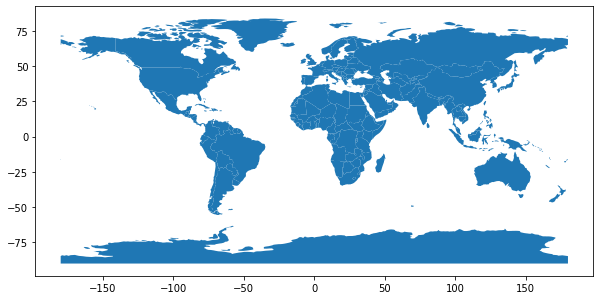

In [51]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  
#https://geopandas.org/en/stable/docs/reference/api/geopandas.datasets.available.html
world = world.to_crs(4326)  # 좌표 변환

ax = world.plot(figsize=(10,10))


세계지도가 그려지는걸 확인했나요? 그렇다면 전세계의 도시를 불러와보세요!

###**🔑참여 실습**


###*Inst.*  
세계도시 데이터셋을 불러와 그림을 그려봅시다.   

 

###*Hint.*  
gpd.datasets.get_path()  
"naturalearth_cities"  
 


###*Solution.*


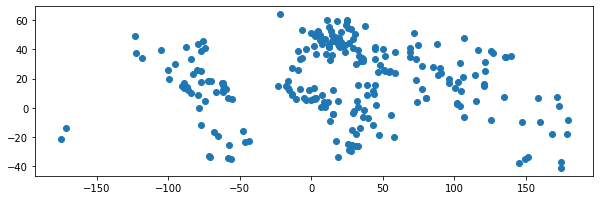

In [52]:
nybb = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))  
#https://geopandas.org/en/stable/docs/reference/api/geopandas.datasets.available.html
nybb = nybb.to_crs(4326)  # Convert the dataset to a coordinate
# system which uses meters

ax = nybb.plot(figsize=(10,10))


세계지도에서 대한민국만 따로 시각화 할 수도 있습니다.!
<br/>속성정보를 추가해서 대한민국 지도를 만들어 보겠습니다.

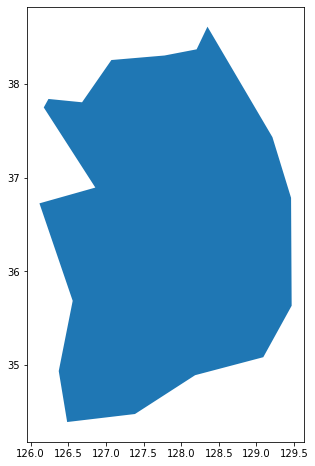

In [53]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
southkorea = world[world.name=='South Korea']
southkorea.plot(figsize=(10,8))


그럼 이 geopandas를 데이터에 적용해 볼까요?

먼저 trian을 이용해 제주도 정류장 위치 정보를 공간데이터로 변환해 보겠습니다.

- longitude, latitude 를 각각 x,y로 변환합니다.
- 저장된 x,y는 하나의 점으로 표현됩니다.
- array로 저장된 공간정보를 확인할 수 있습니다.


In [54]:
jeju_bus = gpd.points_from_xy(train.longitude, train.latitude)
jeju_bus[0:3]

<GeometryArray>
[<POINT (126.494 33.49)>, <POINT (126.485 33.489)>, <POINT (126.474 33.482)>]
Length: 3, dtype: geometry

 그 다음 '18~20_ride'과 'station_code' 열의 속성 정보를 추가해 공간데이터프레임을 업데이트 하겠습니다.

In [55]:
coulumns = ['18~20_ride', 'station_code','in_out']
jeju_bus = gpd.GeoDataFrame(train[coulumns], geometry=jeju_bus, crs=from_epsg(4326))
#df_cctv_gdf.info()
jeju_bus.head()

,18~20_ride,station_code,in_out,geometry
id,,,,
0,0.0,344,1,POINT (126.49373 33.48990)
1,5.0,357,1,POINT (126.48508 33.48944)
2,2.0,432,1,POINT (126.47352 33.48181)
3,53.0,1579,0,POINT (126.49252 33.50577)
4,0.0,1646,0,POINT (126.41260 33.25579)


geopandas의 좌표계 변환 함수인 <font style="font-weight : bold">to_crs()</font>를 이용하여 epsg:4326로 변환합니다.

- to_crs(epsg=4326)

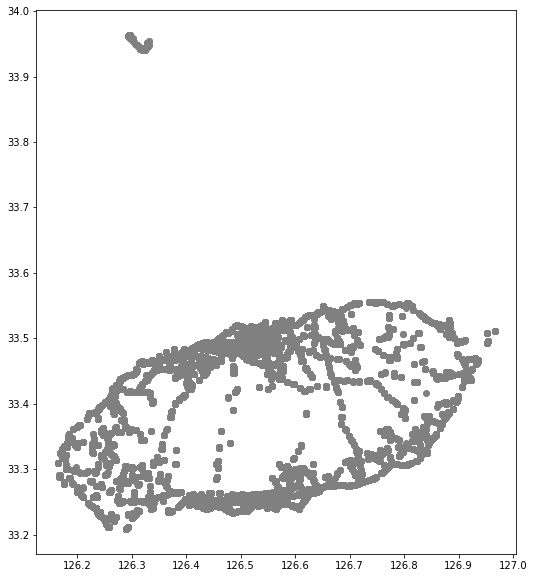

In [56]:
jeju_bus2 = jeju_bus.to_crs(epsg=4326)
jeju_bus2.plot(color='gray', figsize=(10,10))

위의 그림은 데이터에 있는 정류장을 모두 나타낸 그림입니다. </br>버스 노선이 제주도 안을 지나다 보니 그림이 제주도처럼 보이네요!    

train을 전처리할 때 시내버스와 시외버스를 구분했던 것 기억하시나요?
</br>이걸로 시내와 시외를 구분해서 시각화를 해볼게요!


- 시내=0, 시외=1
- jeju_bus['in_out']==0 : in_out 열에 0이 들어 있으면 <font style="font-weight : bold">True</font>, 아니면 <font style="font-weight : bold">False</font>로 나타냄
- jeju_bus[jeju_bus['in_out']==0 ] : True(in_out 열이 0)값 출력 



/usr/local/lib/python3.8/dist-packages/geopandas/array.py:938: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:939: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:940: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/usr/local/lib/python3.8/dist-packages/geopandas/array.py:941: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy
/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:410: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  warnings.warn(


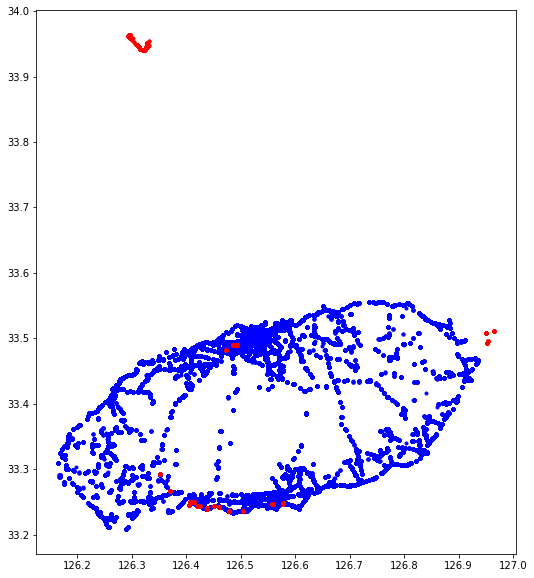

In [57]:
ax=jeju_bus.boundary.plot(linewidth=1,color='black',figsize=(10,10))
jeju_bus[jeju_bus['in_out']==0].plot(ax=ax, color='blue',markersize=9) #시내
jeju_bus[jeju_bus['in_out']==1].plot(ax=ax, color='red',markersize=9) #시외
plt.show()

시내, 시외가 분리된 그림이 완성 되었습니다.
그림의 특징을 알아볼까요? 

- 시외 버스 정류장의 개수는 엄청 적다.
- 섬에는 시외버스 정류장이 있다.
- 섬을 제외하고 시외 버스 정류장은 남쪽에 더 많이 분포한다.


# **3. 데이터 스케일링(Data Scaling)**

정규화와 표준화는 <font style="color:#99CCFF; font-weight : bold; font-size : 25px;">데이터 스케일링</font> 또는 특성 스케일링이라고 불립니다. </br>
정규화와 표준화는 특성들의 단위를 통일시키거나 특성들의 값의 범위를 비슷하게 </br>만들어주는 역할을 합니다.  </br>
 </br>
정규화와 표준화의 차이를 간단히 알아보자면 </br>
정규화는 값의 범위를 <font style="font-weight : bold">0에서 1사이의 값</font>으로 바꿔주고 </br>
표준화는 값의 범위를 <font style="font-weight : bold">평균은 0, 분산은 1</font>이 되도록 바꿔주는 것입니다. 



##**(1) 정규화(Normalization)**

정규화를 하지 않으면❗</br>
각 칼럼에 들어있는 데이터의 상대적 크기로 분석결과가 달라질 수 있습니다.

</br>열 bus_route_id 에는 427000부터 32820000까지의 값을 가집니다.</br>
in_out은 0과 1의 값만 가집니다. </br></br>
이때 정규화를 하지 않고, 모델링을 하게 되면 bus_route_id 변수의 영향이 더 커지게 됩니다. </br>
그래서 숫자 데이터의 상대적인 크기 차이를 제거해서 동일하게 영향을 주도록 하는 게 정규화입니다.


데이터에서 latitude와 logitude는 정규화 하지 않고 그대로 가져갑니다.

In [58]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
train11 = transformer.fit_transform(train[["date","bus_route_id", "in_out", "station_code",
                                            "6~8_ride", "8~10_ride" ,"10~12_ride",  
                                           "6~8_off",  "8~10_off", "10~12_off"]])

train[["date","bus_route_id", "in_out", "station_code",
       "6~8_ride", "8~10_ride" ,"10~12_ride",  "6~8_off",  "8~10_off", "10~12_off"]]=train11

In [59]:
train

,date,bus_route_id,in_out,station_code,latitude,longitude,18~20_ride,6~8_ride,8~10_ride,10~12_ride,6~8_off,8~10_off,10~12_off
id,,,,,,,,,,,,,
0,1.0,0.0,1.0,0.000056,33.48990,126.49373,0.0,0.008772,0.038674,0.045977,0.000000,0.000000,0.0
1,1.0,0.0,1.0,0.000058,33.48944,126.48508,5.0,0.043860,0.033149,0.063218,0.000000,0.000000,0.0
2,1.0,0.0,1.0,0.000070,33.48181,126.47352,2.0,0.017544,0.011050,0.000000,0.000000,0.000000,0.0
3,1.0,0.0,0.0,0.000258,33.50577,126.49252,53.0,0.149123,0.176796,0.172414,0.000000,0.000000,0.0
4,1.0,0.0,0.0,0.000269,33.25579,126.41260,0.0,0.000000,0.000000,0.000000,0.000000,0.011628,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,0.0,1.0,0.0,0.000184,33.41437,126.26336,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0
415419,0.0,1.0,0.0,0.000256,33.49946,126.51479,0.0,0.035088,0.000000,0.000000,0.000000,0.000000,0.0
415420,0.0,1.0,0.0,0.000380,33.23100,126.26273,0.0,0.000000,0.000000,0.000000,0.011765,0.000000,0.0


정규화한 값을 x와 y에 넣어봅시다.

In [60]:
x = train[['date', 'bus_route_id', 'in_out', 'station_code', 'latitude', 'longitude',
       "6~8_ride",  "8~10_ride", "10~12_ride" , 
       "6~8_off", "8~10_off",  "10~12_off"]]

y = train['18~20_ride']

In [61]:
x_train, x_val, y_train, y_val = train_test_split(x, y)

### 🔑**참여 실습**


### *Inst.*  
test데이터도 정규화 해봅시다. 




### *Hint.*  
MinMaxScaler() , fit_transform()



### *Solution.*

In [62]:
transformer = MinMaxScaler()
test11 = transformer.fit_transform(test[["date","bus_route_id", "in_out", "station_code", "6~8_ride", 
                                         "8~10_ride" ,"10~12_ride",  "6~8_off",  "8~10_off", "10~12_off"]])

test[["date","bus_route_id", "in_out", "station_code", "6~8_ride", "8~10_ride" ,
      "10~12_ride",  "6~8_off",  "8~10_off", "10~12_off"]] = test11

# **4. 모델링(Modeling)**

## **4.1 알고리즘 정리**
>## 의사 결정 트리(Decision Tree)

<font style="color:#99CCFF; font-weight : bold; font-size : 25px;">Decision Tree</font>는 일상에서 사용하는 것과 비슷합니다. </br>친구에게 어떤 소파를 살지 추천해달라고 요청하는 것과 같습니다. </br>친구들이 귀하에게 중요한 것이 무엇인지 물어볼 것입니다. 크기? 색상? 직물 또는 가죽? </br>이러한 결정을 바탕으로 귀하의 선택에 따라 완벽한 소파를 찾을 수 있습니다. 

</br>Decision Tree는 기본적으로 일련의 <font style="font-weight : bold">참 또는 거짓 질문</font>을 하여 특정 답변을 유도합니다.
</br>각 <font style="font-weight : bold">"테스트"</font>를 <font style="font-weight : bold">"노드"</font>라고 합니다. </br>각 분기는 해당 선택의 결과를 나타냅니다. 각 리프 노드는 해당 결정의 label입니다. 

</br>명백한 것은 실제 시나리오에서는 전체 그룹이 다르므로 관찰을 분할하여 </br>서로 유사하지만 다른 그룹과는 다른 하위 그룹이 생성합니다.

>## **랜덤 포레스트(Random Forest)**

![image](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)
<출처>https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

</br><font style="color:#99CCFF; font-weight : bold; font-size : 25px;">Random Forest</font>는 Supervised Learning 알고리즘입니다. </br>정확성, 단순성 및 유연성으로 인해 <font style="font-weight : bold">가장 많이 사용</font>되는 알고리즘 중 하나입니다. 
</br><font style="font-weight : bold">분류 및 회귀</font> 작업에 사용할 수 있다는 사실과 <font style="font-weight : bold">비선형 특성</font>을 결합하면 다양한 데이터 및 상황에 매우 적합합니다.

</br>Decision Tree의 숲이 자라기 때문에 "Forest"라고 합니다. </br>이 트리의 데이터를 병합하여 가장 정확한 예측을 보장합니다. </br>단독 의사 결정 트리는 하나의 결과와 좁은 범위의 그룹을 갖지만, </br>포레스트는 더 많은 수의 그룹 및 결정으로 보다 정확한 결과를 보장합니다. </br>랜덤 기능 하위 집합 중에서 최상의 기능을 찾아 모델에 <font style="font-weight : bold">임의성</font>을 추가하는 추가 이점이 있습니다. 

</br>전반적으로 볼 때, 이러한 이점으로 하여 많은 데이터 사이언티스트가 선호하는 </br>광범위한 다양성을 가진 모델이 생성됩니다.

>## **Decision Tree와 Random Forest의 차이점**

Random Forest는 Decision Tree의 그룹입니다. 그러나 양자 사이에는 몇 가지 <font style="color:#FF9999; font-weight : bold; font-size : 25px;">차이점</font>이 있습니다. 

</br>Decision Tre는 의사 결정에 사용하는 <font style="font-weight : bold">규칙</font>을 만드는 경향이 있습니다. 
</br>Random Forest는 기능을 <font style="font-weight : bold">무작위로 선택</font>하고 관찰하여 Decision Tree의 Forest를 만든 다음 결과를 <font style="font-weight : bold">평균화</font>합니다.

</br>이론에 따르면 많은 수의 상관되지 않은 Tree가 하나의 개별 Decision Tree보다 더 정확한 예측을 생성합니다. 
</br>이는 많은 Tree가 함께 작동하여 개별 오류와 overfitting으로부터 서로를 보호하기 때문입니다.

## **4.2 Random Forest + validation set**

In [63]:
# RandomForestRegressor 객체 호출
from sklearn.ensemble import RandomForestRegressor

### 🔑**참여 실습**


### *Inst.*  
모델 선언






### *Hint.*  
RandomForestRegressor()






### *Solution.*

In [64]:
# 모델 선언
model = RandomForestRegressor()

In [65]:
# 모델-데이터셋의 학습 진행
model.fit(x_train, y_train)

RandomForestRegressor()

In [66]:
# 학습된 model로 x_train의 결과를 얻어낸 다음, 그 예측과 y_train을 비교
# training set 정확도 확인
print("training set accuracy:", model.score(x_train, y_train))

training set accuracy: 0.9510504495653924


In [67]:
print("validation set accuracy:", model.score(x_val, y_val))

validation set accuracy: 0.6536167993689574


In [68]:
# 학습된 모델을 이용해 결괏값 예측
predict = model.predict(test)
predict

array([12.77, 13.57,  3.69, ...,  0.  ,  0.92,  0.  ])

In [69]:
# 반올림
predict = predict.round(0)
predict

array([13., 14.,  4., ...,  0.,  1.,  0.])

In [70]:
# float type -> int type 변환
predict = predict.astype(int)
predict

array([13, 14,  4, ...,  0,  1,  0])

In [71]:
# 0보다 작은 수를 0으로 변환
predict[predict < 0] = 0
predict

array([13, 14,  4, ...,  0,  1,  0])

# **5. 제출파일 생성**

지난 시간과 마찬가지로 train data, test data, validation data로 나눈 다음 학습은 진행하였습니다.
</br>이를 통한 Random Forest Model의 예측값으로 test의 18~20_ride 값을 채워봅시다.

In [72]:
test['18~20_ride'] = predict
test['18~20_ride'] 

id
415423    13
415424    14
415425     4
415426    51
415427     0
          ..
643588     0
643589     0
643590     0
643591     1
643592     0
Name: 18~20_ride, Length: 228170, dtype: int64

지난 시간에 설명드렸 듯이 to_csv 메소드는 </br>데이터 프레임 객체의 내용을 csv 파일 형태로 만들어서 저장해 주는 기능입니다.
</br>index를 포함시키지 않고 데이터를 저장하기 위해서는 </br>to_csv(inedx=False)로 지정해서 데이터를 저장해주면 됩니다.

</br>이제 제출용 파일인 submission.csv를 저장해봅시다. 

In [73]:
test[['18~20_ride']].to_csv('submission.csv')